In [1]:
import scanpy as sc
import scIB
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize']=(8,8)

In [3]:
root = "/storage/groups/ml01/workspace/group.daniela"

In [4]:
def rename_mammary(adata):
    adata.obs.tissue = ['Mammary' if x == 'Mammary_Gland' else x for x in adata.obs.tissue]

# Raw data

In [4]:
adata = sc.read(root+"/atlases_merged_anno_new.h5ad", cache=True)

In [5]:
adata

AnnData object with n_obs × n_vars = 133340 × 18756 
    obs: 'barcode', 'batch', 'cell_type', 'cell_type_union', 'channel', 'log_counts', 'marker_gene', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'sample_id', 'sex', 'size_factors', 'study', 'tissue'
    var: 'gene_ids-1-1'
    layers: 'counts'

In [ ]:
rename_mammary(adata)

In [14]:
#scIB.pp.reduce_data(adata, batch_key='study', n_top_genes=2000, use_rep='X_pca', pca=True, umap=True))

HVG
Using 353 HVGs from full intersect set
Using 912 HVGs from n_batch-1 set
Using 735 HVGs from n_batch-2 set
Using 2000 HVGs
Computed 2000 highly variable genes
PCA
Nearest Neigbours
UMAP


In [ ]:
adata.write(root + "/atlases_analysis/adata_merged_preprocessed.h5ad")

In [13]:
adata = sc.read(root + "/atlases_analysis/adata_merged_preprocessed.h5ad", cache=True)

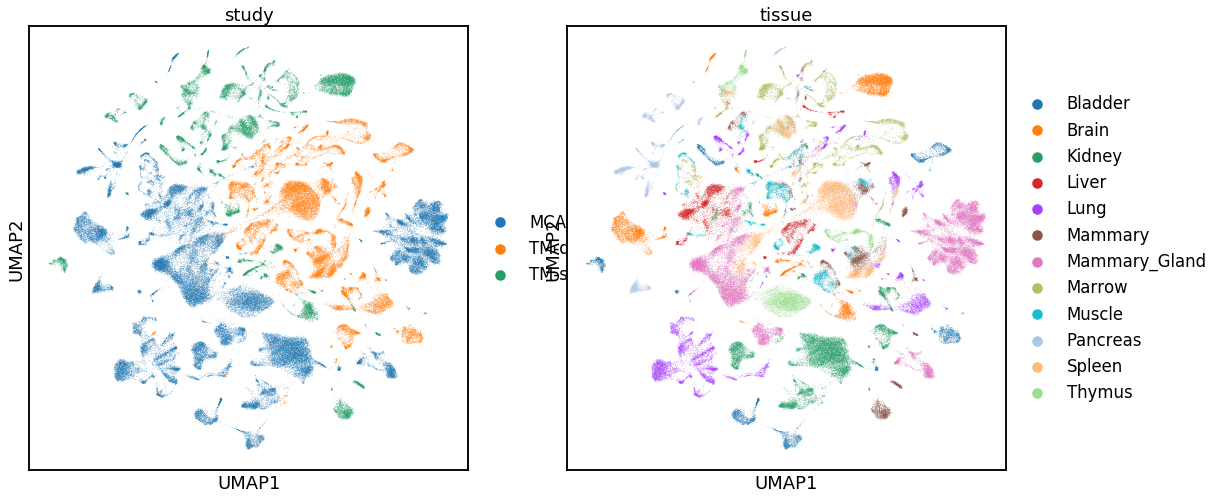

In [14]:
sc.pl.umap(adata, color=['study', 'tissue'], palette=sc.pl.palettes.vega_20_scanpy)

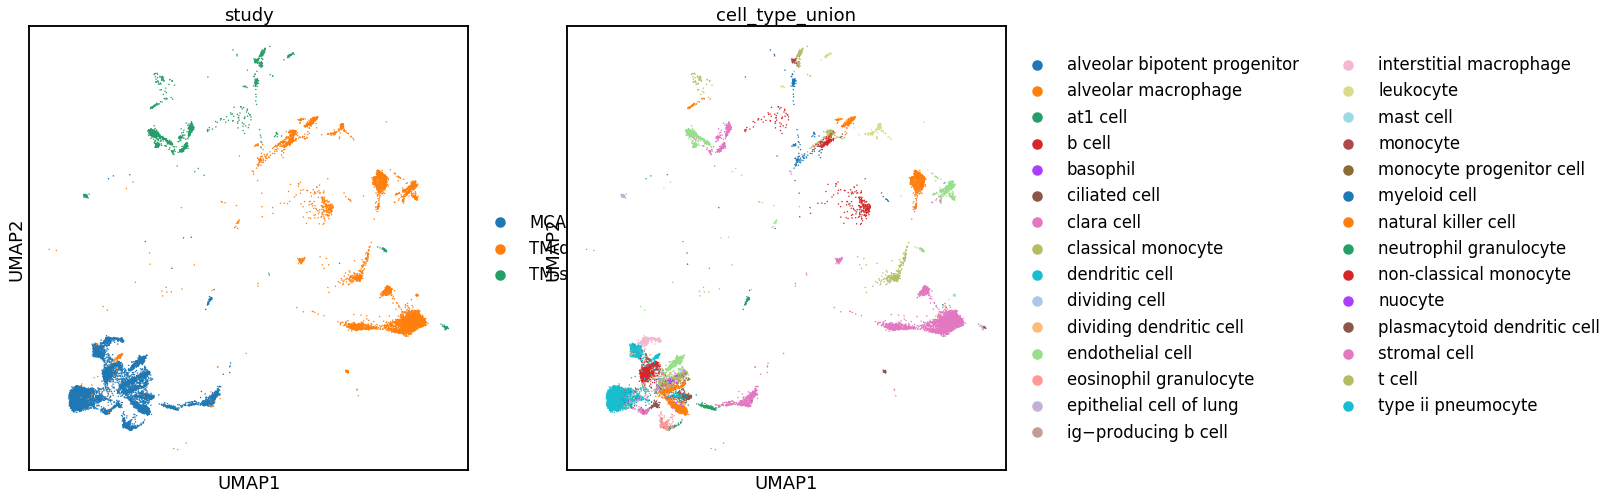

In [15]:
sc.pl.umap(adata[adata.obs.tissue == 'Lung'], color=['study', 'cell_type_union'], palette=sc.pl.palettes.vega_20_scanpy)

In [16]:
scIB.pp.score_cell_cycle(adata)

['Mcm5', 'Pcna', 'Tyms', 'Fen1', 'Mcm2', 'Mcm4', 'Rrm1', 'Ung', 'Gins2', 'Mcm6', 'Cdca7', 'Dtl', 'Prim1', 'Uhrf1', 'Hells', 'Rfc2', 'Rpa2', 'Nasp', 'Rad51ap1', 'Gmnn', 'Wdr76', 'Slbp', 'Ccne2', 'Ubr7', 'Pold3', 'Msh2', 'Atad2', 'Rad51', 'Rrm2', 'Cdc45', 'Cdc6', 'Exo1', 'Tipin', 'Dscc1', 'Blm', 'Casp8ap2', 'Usp1', 'Clspn', 'Pola1', 'Chaf1b', 'Brip1', 'E2f8']
['Hmgb2', 'Cdk1', 'Nusap1', 'Ube2c', 'Birc5', 'Tpx2', 'Top2a', 'Ndc80', 'Cks2', 'Nuf2', 'Cks1b', 'Mki67', 'Tmpo', 'Cenpf', 'Tacc3', 'Fam64a', 'Smc4', 'Ccnb2', 'Ckap2l', 'Ckap2', 'Aurkb', 'Bub1', 'Kif11', 'Anp32e', 'Tubb4b', 'Gtse1', 'Kif20b', 'Hjurp', 'Cdca3', 'Hn1', 'Cdc20', 'Ttk', 'Cdc25c', 'Kif2c', 'Rangap1', 'Ncapd2', 'Dlgap5', 'Cdca2', 'Cdca8', 'Ect2', 'Kif23', 'Hmmr', 'Aurka', 'Psrc1', 'Anln', 'Lbr', 'Ckap5', 'Cenpe', 'Ctcf', 'Nek2', 'G2e3', 'Gas2l3', 'Cbx5', 'Cenpa']


... storing 'phase' as categorical


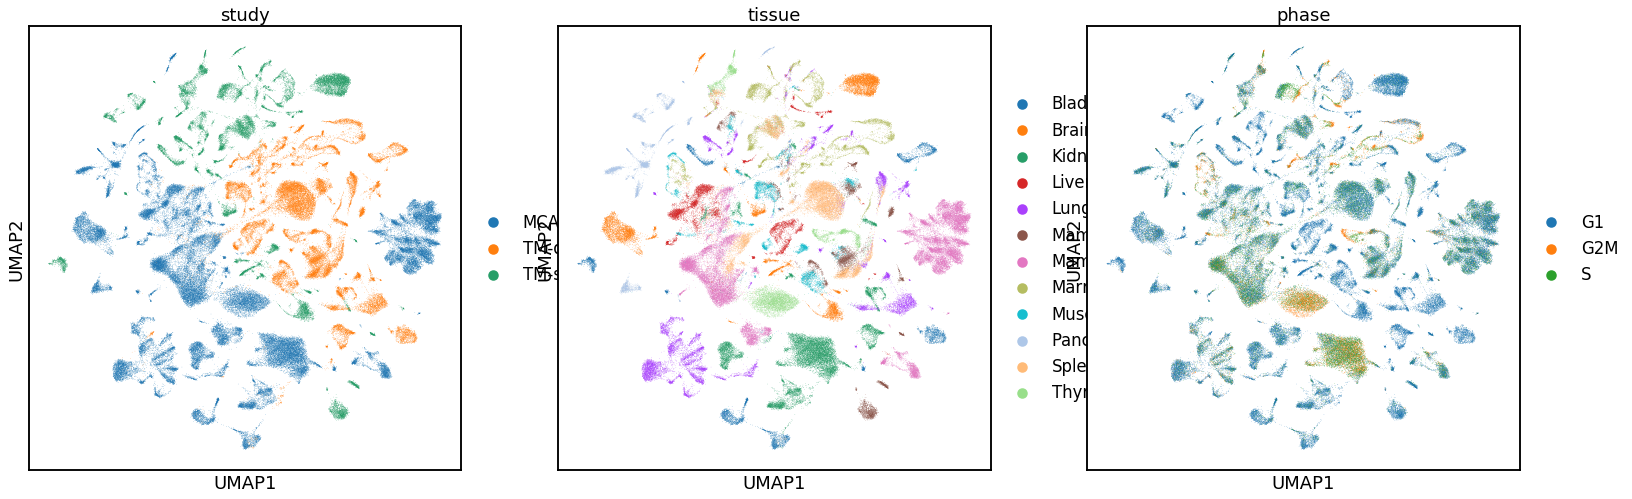

In [17]:
sc.pl.umap(adata, color=['study', 'tissue', 'phase'])

# Integrated Data

## Scanorama

In [17]:
scanorama = sc.read(root+"/atlases_integrated/scanorama.h5ad", cache=True)

### Corrected expression matrix

In [18]:
scIB.pp.reduce_data(scanorama, n_top_genes=None, use_rep='X_pca', pca=True, umap=True)

PCA
Nearest Neigbours
UMAP


In [19]:
scanorama.write(root + "/atlases_analysis/scanorama_full.h5ad")

In [18]:
scanorama = sc.read(root + "/atlases_analysis/scanorama_full.h5ad")

In [19]:
rename_mammary(scanorama)

... storing 'tissue' as categorical


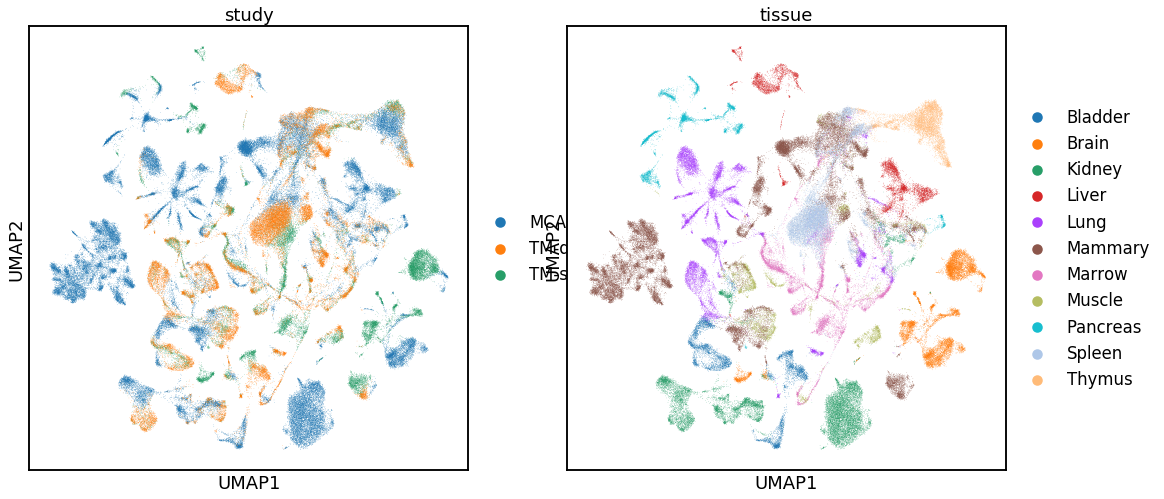

In [7]:
sc.pl.umap(scanorama, color=['study', 'tissue'], palette=sc.pl.palettes.vega_20_scanpy)

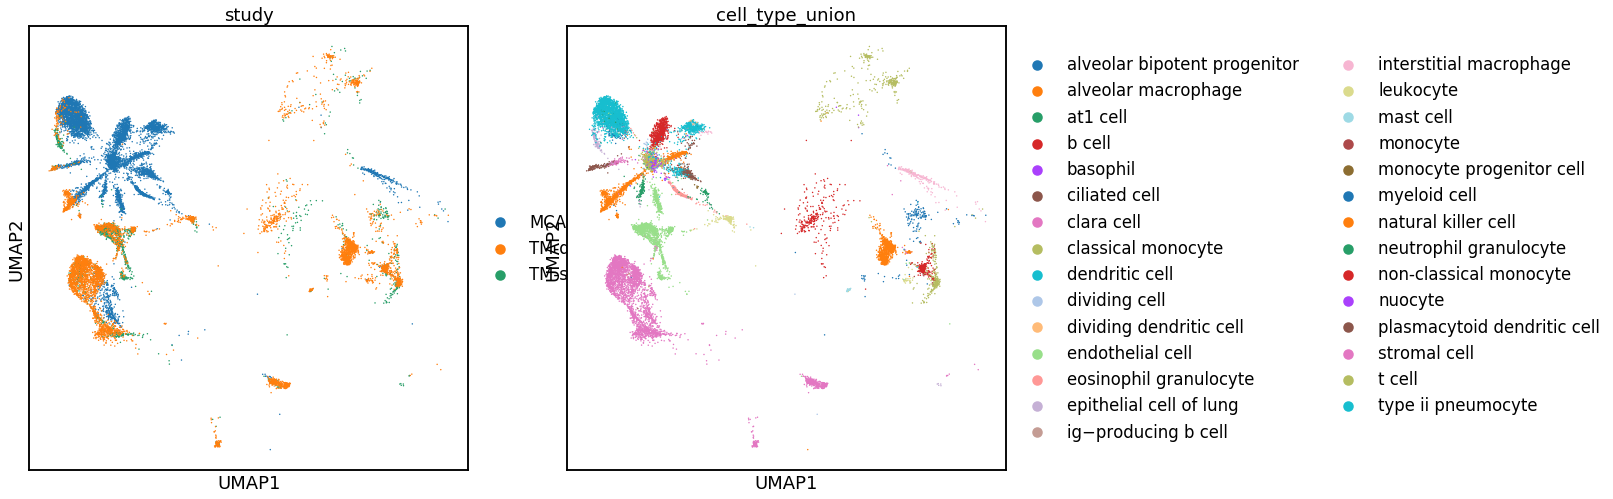

In [8]:
sc.pl.umap(scanorama[scanorama.obs.tissue == 'Lung'], color=['study', 'cell_type_union'], palette=sc.pl.palettes.vega_20_scanpy)

In [10]:
sc.tl.score_genes_cell_cycle(scanorama, s_genes=['Rrm2'], g2m_genes=['Cdk1', 'Nusap1', 'Ube2c', 
    'Birc5', 'Top2a', 'Mki67', 'Cenpf', 'Ccnb2', 'Cdca3', 'Cdc20', 'Cdca8', 'Cenpa'])

AxisError: axis 1 is out of bounds for array of dimension 1

In [20]:
scIB.pp.score_cell_cycle(scanorama, organism='mouse')

['Rrm2']
['Cdk1', 'Nusap1', 'Ube2c', 'Birc5', 'Top2a', 'Mki67', 'Cenpf', 'Ccnb2', 'Cdca3', 'Cdc20', 'Cdca8', 'Cenpa']


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
sc.pl.umap(scanorama, color=['study', 'tissue', 'phase'])

### Embedding

In [42]:
scanorama.obsm['X_pca'] = scanorama.obsm['X_emb']

In [43]:
scIB.pp.reduce_data(scanorama, n_top_genes=None, use_rep='X_emb', pca=False, umap=True)

Nearest Neigbours
UMAP


In [44]:
scanorama.write(root + "/atlases_analysis/scanorama_embed.h5ad")

In [62]:
scanorama_embed = sc.read(root + "/atlases_analysis/scanorama_embed.h5ad")

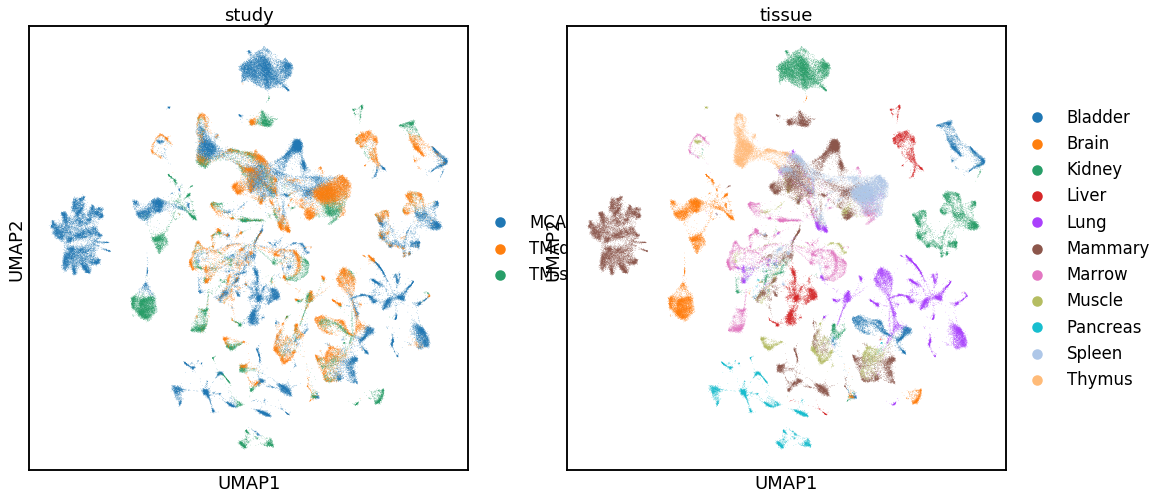

In [63]:
sc.pl.umap(scanorama_embed, color=['study', 'tissue'], palette = sc.pl.palettes.vega_20_scanpy)

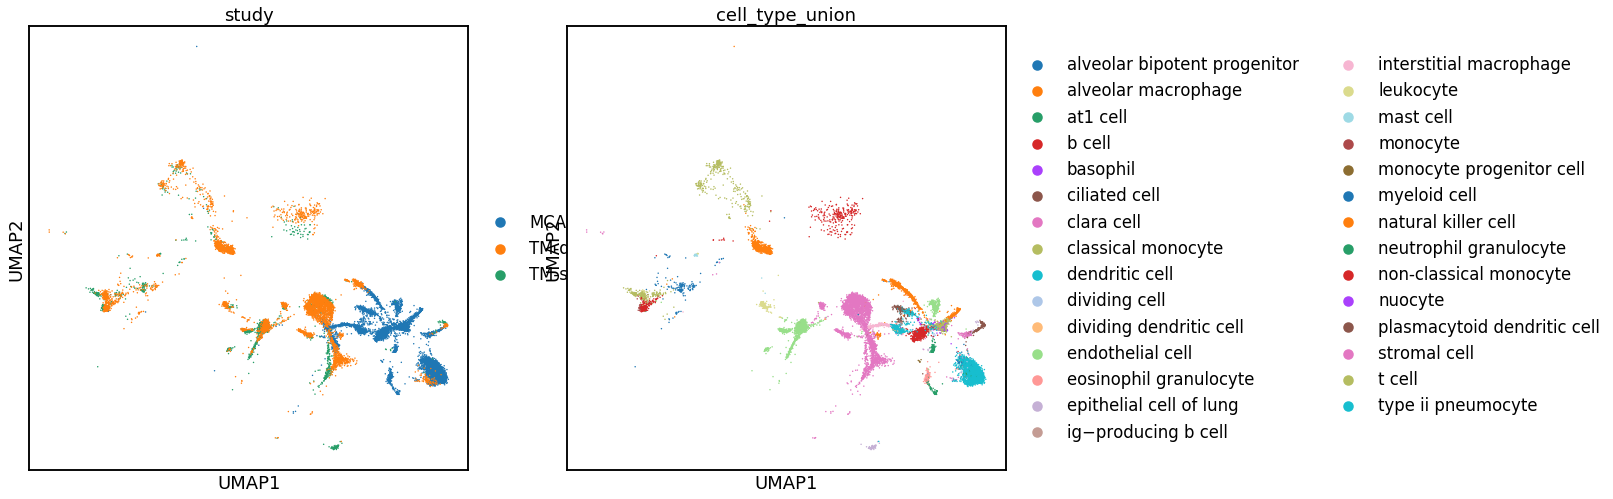

In [64]:
sc.pl.umap(scanorama_embed[scanorama_embed.obs.tissue == 'Lung'], color=['study', 'cell_type_union'], palette=sc.pl.palettes.vega_20_scanpy)

### BBKNN - kNN

In [7]:
bbknn = sc.read(root+"/atlases_integrated/bbknn.h5ad")

In [47]:
rename_mammary(bbknn)

In [ ]:
scIB.pp.reduce_data(bbknn, n_top_genes=None, neighbors=False, pca=False, umap=True)

In [ ]:
bbknn.write(root + "/atlases_analysis/bbknn_knn.h5ad")

In [46]:
bbknn = sc.read(root + "/atlases_analysis/bbknn_knn.h5ad")

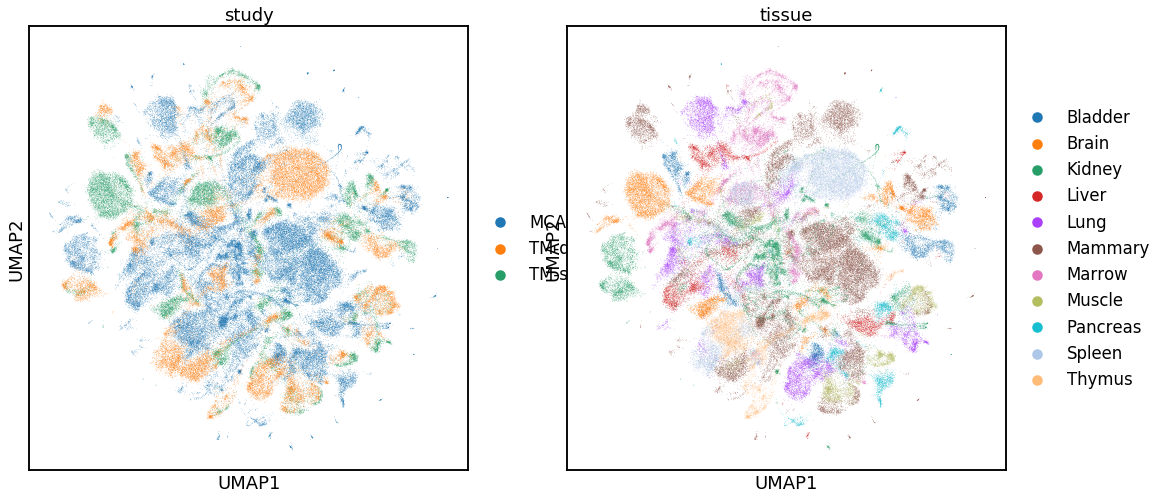

In [49]:
sc.pl.umap(bbknn, color=['study', 'tissue'], palette = sc.pl.palettes.vega_20_scanpy)

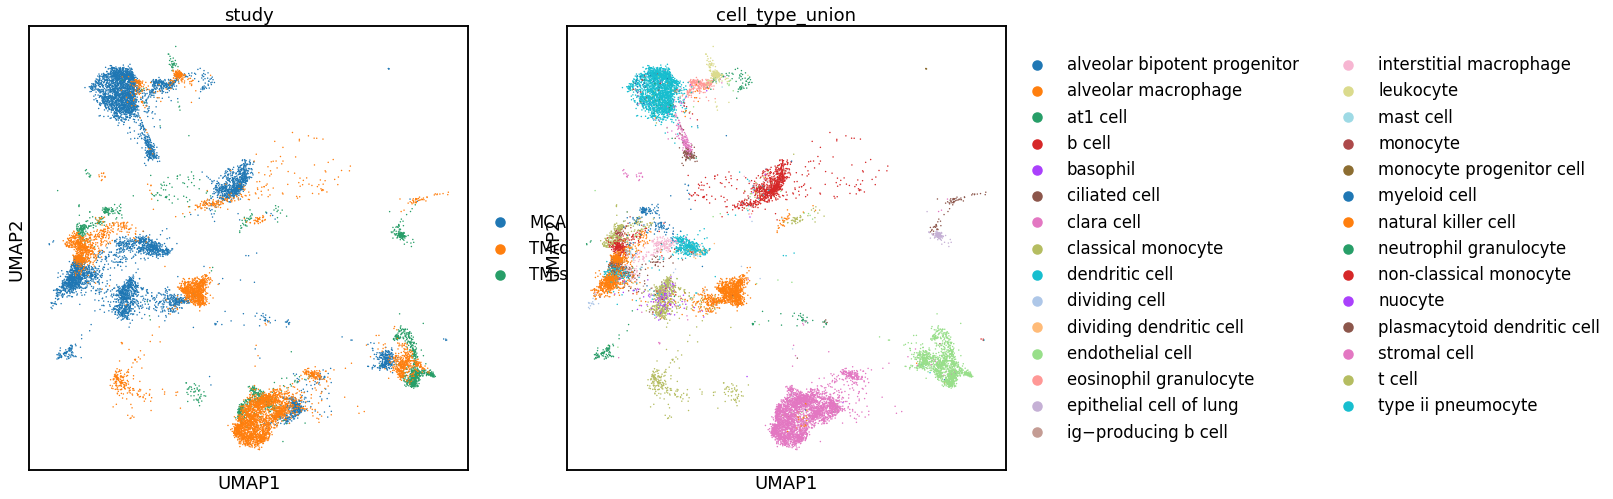

In [61]:
sc.pl.umap(bbknn[bbknn.obs.tissue == 'Lung'], color=['study', 'cell_type_union'], palette=sc.pl.palettes.vega_20_scanpy)

## Seurat - expression matrix

In [8]:
seurat = sc.read(root+"/atlases_integrated/seurat.h5ad")

In [ ]:
scIB.pp.reduce_data(seurat, n_top_genes=None, use_rep='X_pca', pca=True, umap=True)

In [ ]:
seurat.write(root + "/atlases_analysis/seurat.h5ad")

In [50]:
seurat = sc.read(root + "/atlases_analysis/seurat.h5ad")

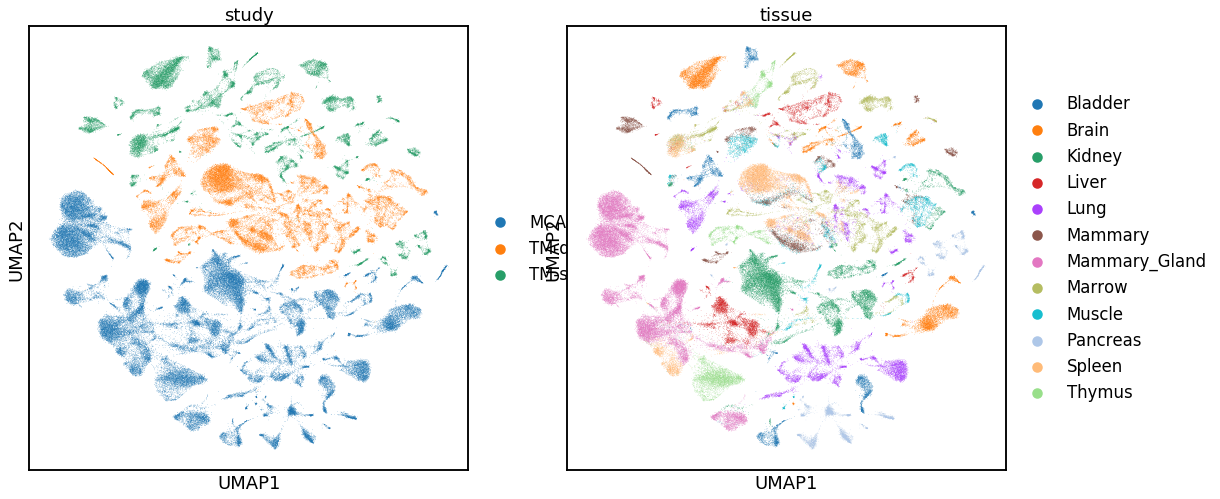

In [53]:
sc.pl.umap(seurat, color=['study', 'tissue'], palette = sc.pl.palettes.vega_20_scanpy)

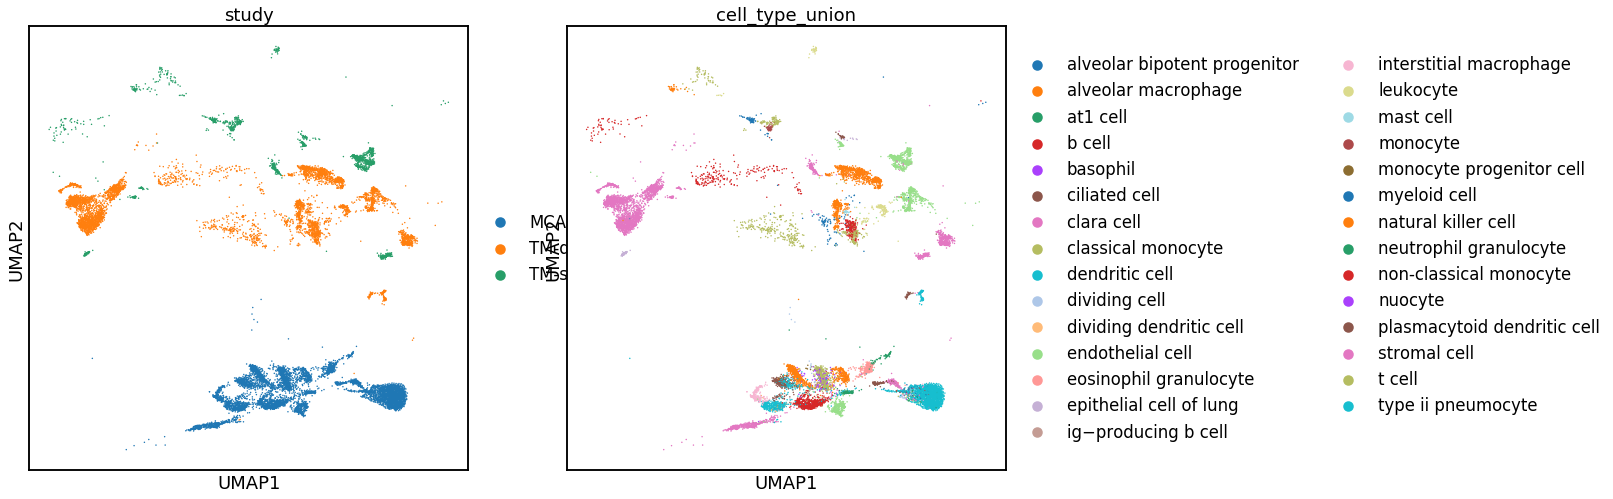

In [60]:
sc.pl.umap(seurat[seurat.obs.tissue == 'Lung'], color=['study', 'cell_type_union'], palette=sc.pl.palettes.vega_20_scanpy)

## trVAE - embedding

In [9]:
trvae = sc.read(root+"/atlases_integrated/trvae.h5ad")

In [ ]:
scIB.pp.reduce_data(trvae, n_top_genes=None, use_rep='X_emb', pca=True, umap=True)

In [ ]:
trvae.write(root + "/atlases_analysis/trvae.h5ad")

In [65]:
trvae = sc.read(root + "/atlases_analysis/trvae.h5ad")

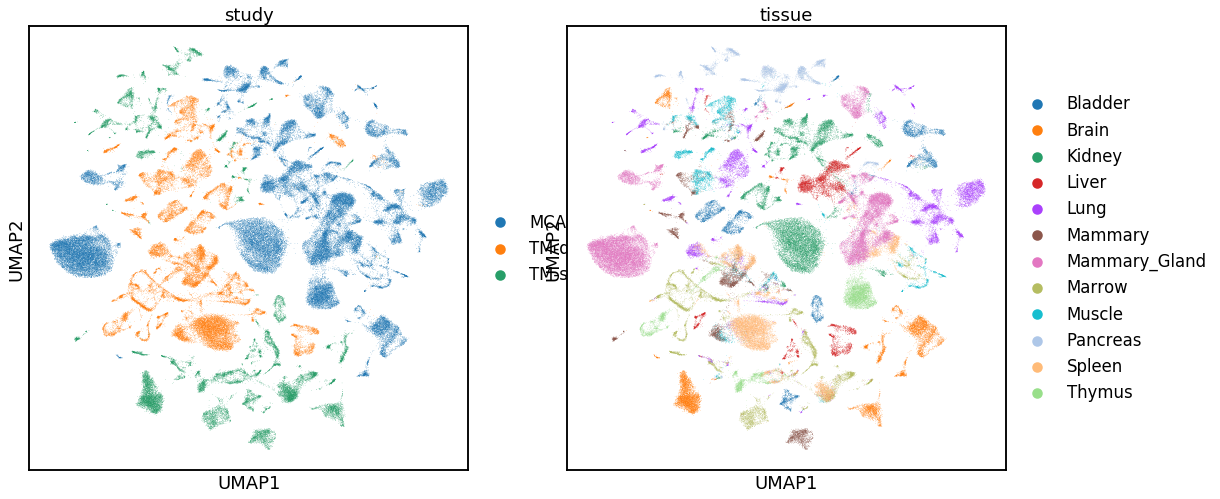

In [66]:
sc.pl.umap(trvae, color=['study', 'tissue'], palette = sc.pl.palettes.vega_20_scanpy)

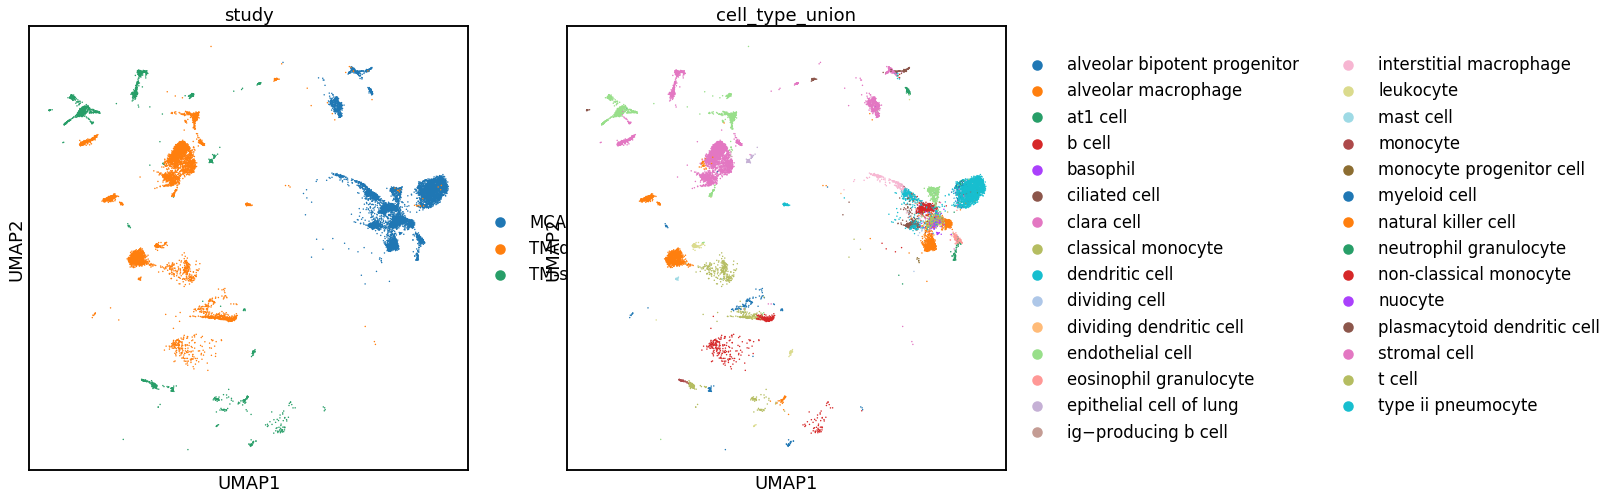

In [67]:
sc.pl.umap(trvae[trvae.obs.tissue == 'Lung'], color=['study', 'cell_type_union'], palette=sc.pl.palettes.vega_20_scanpy)